## Viewing data

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import talib
import datetime as datetime
import pandas_datareader as data
import mpl_finance as mpf

df = pd.read_csv('data/TWSE2018.csv',low_memory=False)
df.head()

,證券代碼,年月日,開盤價(元),最高價(元),最低價(元),收盤價(元),成交量(千股),成交值(千元),成交筆數(筆),流通在外股數(千股),本益比-TSE,股價淨值比-TSE
0,1101 台泥,2018/12/28,35.4,35.75,35.4,35.6,"8,117","288,722","3,471","5,108,059",9.78,1.07
1,1102 亞泥,2018/12/28,33.55,34.3,33.55,33.95,"5,297","180,516","1,916","3,361,447",10.38,0.83
2,1103 嘉泥,2018/12/28,13.5,13.6,13.45,13.6,200,"2,707",78,"774,780",4.81,0.42
3,1104 環泥,2018/12/28,18.8,18.9,18.8,18.9,69,"1,310",52,"653,609",10.8,0.70
4,1108 幸福,2018/12/28,7.34,7.35,7.34,7.34,31,229,18,"404,738",0,0.68


In [2]:
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237720 entries, 0 to 237719
Data columns (total 12 columns):
證券代碼          237720 non-null object
年月日           237720 non-null object
開盤價(元)        237720 non-null object
最高價(元)        237720 non-null object
最低價(元)        237720 non-null object
收盤價(元)        237720 non-null object
成交量(千股)       237720 non-null object
成交值(千元)       237720 non-null object
成交筆數(筆)       237720 non-null object
流通在外股數(千股)    237720 non-null object
本益比-TSE       229075 non-null object
股價淨值比-TSE     224876 non-null float64
dtypes: float64(1), object(11)
memory usage: 21.8+ MB


Index(['證券代碼', '年月日', '開盤價(元)', '最高價(元)', '最低價(元)', '收盤價(元)', '成交量(千股)',
       '成交值(千元)', '成交筆數(筆)', '流通在外股數(千股)', '本益比-TSE', '股價淨值比-TSE'],
      dtype='object')

In [3]:
df[df['證券代碼'].str.contains("2456")].head()

,證券代碼,年月日,開盤價(元),最高價(元),最低價(元),收盤價(元),成交量(千股),成交值(千元),成交筆數(筆),流通在外股數(千股),本益比-TSE,股價淨值比-TSE
358,2456 奇力新,2018/12/28,80.1,80.4,78,78.5,"4,436","349,209","3,533","243,175",6.21,0.79
1336,2456 奇力新,2018/12/27,82,82,79.5,79.5,"4,913","396,744","3,699","243,013",6.29,0.80
2314,2456 奇力新,2018/12/26,82.9,84,79,79,"4,451","363,508","3,432","243,013",6.25,0.79
3292,2456 奇力新,2018/12/25,83,83,81.6,82,"2,944","242,117","2,219","243,013",6.49,0.82
4270,2456 奇力新,2018/12/24,84.5,84.5,83.3,84.3,"2,286","192,409","1,671","243,013",6.67,0.84


## Stock view and graph

In [4]:
df['年月日'] = pd.to_datetime(df['年月日'], format = '%Y/%m/%d') ## 日期格式化
df['月'] = df['年月日'].dt.month #新增“月”欄位

## 找出奇力新股票，轉成DataFrame
df_2456 = pd.DataFrame(df[df['證券代碼'].str.contains("2456")])
df_2456 = df_2456.reset_index(drop=True) #reset index

In [5]:
df_2456 = df_2456.reindex(index=df_2456.index[::-1]) ## DataFrame 反轉
df_2456 = df_2456.reset_index(drop=True) #reset index
df_2456.head()

,證券代碼,年月日,開盤價(元),最高價(元),最低價(元),收盤價(元),成交量(千股),成交值(千元),成交筆數(筆),流通在外股數(千股),本益比-TSE,股價淨值比-TSE,月
0,2456 奇力新,2018-01-02,133.94,136.49,132.86,135.82,"6,110","613,536","3,654","237,504",20.32,3.35,1
1,2456 奇力新,2018-01-03,135.82,135.82,135.82,135.82,0,0,0,"237,504",20.32,3.35,1
2,2456 奇力新,2018-01-04,149.27,149.27,149.27,149.27,"2,866","318,219","1,072","237,504",22.33,3.68,1
3,2456 奇力新,2018-01-05,149.94,153.3,141.87,145.9,"19,981","2,199,009","10,863","237,504",21.83,3.60,1
4,2456 奇力新,2018-01-08,147.25,147.92,138.51,141.2,"5,756","613,737","3,672","237,504",21.13,3.48,1


In [6]:
#sma_10 = talib.SMA(np.array(df_2456['收盤價(元)']), 10) 
## 直接這樣打會噴 ”real is not double“ 
## TA-lib不喜歡“真實數據” 要將數據轉成浮點數
# ref: https://stackoverflow.com/questions/22993124/ta-lib-numpy-assertionerror-real-is-not-double

to_float = np.array(df_2456['收盤價(元)'], dtype=float) # 轉成float
sma_10 = talib.SMA(to_float,10) # 10日均線  
sma_30 = talib.SMA(to_float, 30)  # 30日均線
df_2456['10日均線'] = sma_10
df_2456['30日均線'] = sma_30

df_2456['10日均線'] = df_2456['10日均線'].fillna(0.0) # 填補遺漏值
df_2456['30日均線'] = df_2456['30日均線'].fillna(0.0)# 填補遺漏值

In [7]:
df_2456[20:30]

,證券代碼,年月日,開盤價(元),最高價(元),最低價(元),收盤價(元),成交量(千股),成交值(千元),成交筆數(筆),流通在外股數(千股),本益比-TSE,股價淨值比-TSE,月,10日均線,30日均線
20,2456 奇力新,2018-01-30,130.44,132.59,129.77,130.57,"1,192","116,296",884,"237,504",19.54,3.22,1,132.415,0.000000
21,2456 奇力新,2018-01-31,129.9,132.05,128.15,130.71,"1,288","125,073","1,038","237,747",19.56,3.22,1,132.335,0.000000
22,2456 奇力新,2018-02-01,131.51,132.19,129.09,129.77,"2,027","196,140","1,664","237,747",19.42,3.20,2,132.093,0.000000
23,2456 奇力新,2018-02-02,131.25,132.19,129.36,129.36,"1,715","166,930","1,234","237,747",19.36,3.19,2,131.689,0.000000
24,2456 奇力新,2018-02-05,125.19,128.29,123.85,127.21,"1,859","174,172","1,345","237,747",19.03,3.14,2,130.627,0.000000
25,2456 奇力新,2018-02-06,124.12,124.25,114.57,118.2,"4,411","390,150","2,871","237,747",17.69,2.92,2,129.013,0.000000
26,2456 奇力新,2018-02-07,121.43,123.04,118.2,118.2,"3,499","314,851","2,386","237,747",17.69,2.92,2,127.480,0.000000
27,2456 奇力新,2018-02-08,118.34,119.95,117.26,119.01,"1,237","109,032","1,014","237,747",17.81,2.94,2,126.203,0.000000
28,2456 奇力新,2018-02-09,111.88,117.66,111.88,117.53,"1,879","160,837","1,238","237,747",17.59,2.90,2,125.100,0.000000
29,2456 奇力新,2018-02-12,118.34,119.14,116.18,116.45,"1,172","102,270",828,"237,747",17.42,2.87,2,123.701,131.492333


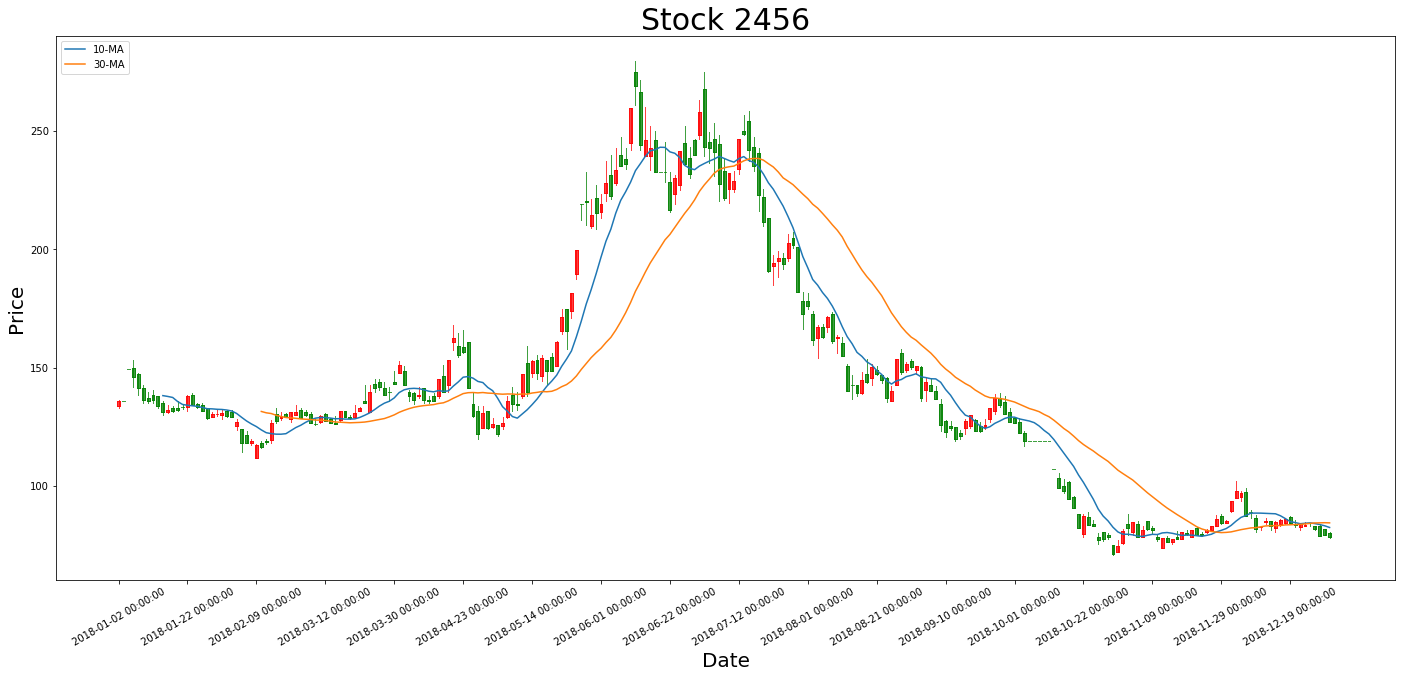

In [8]:
fig = plt.figure(figsize=(24, 10)) ## 繪圖
ax = fig.add_subplot(1,1,1) #單一子圖
ax.set_xticks(range(0,len(df_2456),14))
ax.set_xticklabels(df_2456['年月日'][::14], rotation=30)
ax.set_xlabel('Date',fontsize='20')
ax.set_ylabel('Price',fontsize='20')
ax.set_title('Stock 2456',fontsize='30')


## 先轉float
for i in df_2456.columns:
    if((i == '開盤價(元)')|(i == '最高價(元)')|(i == '最低價(元)')|(i == '收盤價(元)')):
        df_2456[i] = np.array(df_2456[i], dtype=float)

## 蠟燭圖
mpf.candlestick2_ochl(ax,df_2456['開盤價(元)'],df_2456['收盤價(元)'],df_2456['最高價(元)'],df_2456['最低價(元)']
                      ,width=0.6, colorup='r', colordown='g', alpha=0.75)

ax.plot(sma_10, label='10-MA')
ax.plot(sma_30, label='30-MA')
ax.legend(loc=2)

## Finding Reversal point

In [9]:
df_2456['漲幅'] = 0.0
df_2456['漲/跌'] = ''
sigma = 0.03 ## 自訂幅度

for index, row in df_2456.iterrows():
    try:
        wave = (df_2456.loc[index,'最高價(元)'] - df_2456.loc[index-1,'收盤價(元)']) / df_2456.loc[index-1,'收盤價(元)']
        df_2456.loc[index,'漲幅'] = wave
        if wave > sigma:
            df_2456.loc[index,'漲/跌'] = '漲'
        elif wave < -sigma:
            df_2456.loc[index,'漲/跌'] = '跌'
        else: 
            df_2456.loc[index,'漲/跌'] = '持平'
    except:
        continue

In [10]:
df_2456[df_2456['漲/跌']=='跌'].head()

,證券代碼,年月日,開盤價(元),最高價(元),最低價(元),收盤價(元),成交量(千股),成交值(千元),成交筆數(筆),流通在外股數(千股),本益比-TSE,股價淨值比-TSE,月,10日均線,30日均線,漲幅,漲/跌
190,2456 奇力新,2018-10-12,107.0,107.0,107.0,107.0,719,"76,952","1,148","226,230",18.45,1.51,10,119.614,127.782333,-0.099402,跌
199,2456 奇力新,2018-10-25,78.5,80.1,75.6,77.0,"15,882","1,237,488","10,355","226,230",13.28,1.09,10,90.250,113.223333,-0.037260,跌
202,2456 奇力新,2018-10-30,75.2,75.2,70.9,71.1,"16,960","1,232,242","10,584","226,230",12.26,1.01,10,82.570,108.526000,-0.043257,跌


In [11]:
len(df_2456[df_2456['漲/跌']=='持平'])

141

In [12]:
df_2456['交叉種類'] = ''
point_arr = []
for index, row in df_2456.iterrows():
    try:
        if (df_2456.loc[index,'30日均線'] > df_2456.loc[index,'10日均線'] and
        df_2456.loc[index+1,'30日均線'] < df_2456.loc[index+1,'10日均線']):
            df_2456.loc[index,'交叉種類'] ='黃金'
            print('黃金交叉：'+str(df_2456.loc[index,'年月日'])+' index: '+str(index))
            
            point_arr.append(df_2456.iloc[index,:]) ##塞到新array
        elif (df_2456.loc[index,'30日均線'] < df_2456.loc[index,'10日均線'] and 
        df_2456.loc[index+1,'30日均線'] > df_2456.loc[index+1,'10日均線']):
            print('死亡交叉：'+str(df_2456.loc[index,'年月日'])+' index: '+str(index))
            df_2456.loc[index,'交叉種類'] ='死亡'
            point_arr.append(df_2456.iloc[index,:]) ##塞到新array
    except:
        continue

死亡交叉：2018-02-09 00:00:00 index: 28
黃金交叉：2018-03-07 00:00:00 index: 39
死亡交叉：2018-05-02 00:00:00 index: 76
黃金交叉：2018-05-16 00:00:00 index: 86
死亡交叉：2018-07-13 00:00:00 index: 127
黃金交叉：2018-11-27 00:00:00 index: 222
死亡交叉：2018-12-24 00:00:00 index: 242


In [13]:
rf = pd.DataFrame(point_arr,columns=new_index) ## 交叉點 dataframe
rf

NameError: name 'new_index' is not defined

In [ ]:
df_forum2 = pd.read_csv("data/forum2.csv",low_memory=False)
df_forum2['post_time'] = pd.to_datetime(df_forum2['post_time'], format = '%Y/%m/%d') ## 字串轉日期格式
df_forum2[['post_time','title','content']]